In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi']=300

import sys
sys.path.append('../../k_spaces')

import kspaces.EM
import kspaces.plotting
import kspaces.generate
import kspaces.affine_subspace_

In [2]:
np.random.seed(0)

In [3]:
t1 = [2,2,0]
v1 = [[1,0,0],[0,1,0.3]]
X1 = kspaces.generate.generate_points_subspace(t1, v1, 4000, dist_std = 4, noise_std=0.1)
s1 = kspaces.affine_subspace_.affine_subspace(v1, t1, 0.1, [3,3], 0)
c1 =[[1,0,0,0]]*4000

In [4]:
t2 = [0,6,6]
v2 = [[1,1,1]]
X2 = kspaces.generate.generate_points_subspace(t2, v2, 200, dist_std = 6, noise_std=0.1)
s2 = kspaces.affine_subspace_.affine_subspace(v2, t2, 0.1, [3], 0)
c2 = [[0,1,0,0]]*200

In [5]:
t3 = [7,-8,9]
v3 = []
X3 = kspaces.generate.generate_points_subspace(t3, v3, 100, dist_std = 3, noise_std=2)
s3 = kspaces.affine_subspace_.affine_subspace(v3, t3, 0.5, [], 0)
c3 = [[0,0,1,0]]*100

In [6]:
t4 = [0,6,3]
v4 = [[-1,1,3]]
X4 = kspaces.generate.generate_points_subspace(t4, v4, 300, dist_std = 5, noise_std=1)
s4 = kspaces.affine_subspace_.affine_subspace(v4, t4, 0.4, [5], 0)
c4 = [[0,0,0,1]]*300

In [7]:
def plot_3D(points,spaces, axis_labels = ('','',''),title = '', equal_dims = True, color_probabilities = [], f = '', el = 70, az = 20):
    """create a 3D plot with matplotlib"""
    # Create figure and subplots
    fig, ax = plt.subplots(figsize=(6, 4), subplot_kw={'projection': '3d'})
    x = points[:,0]
    y = points[:,1]
    z = points[:,2]
    
    colors = np.array(['crimson', 'blue', 'darkorange', 'green', 'violet','brown'])
    
    xlim = [min(x), max(x)]
    ylim = [min(y), max(y)]
    zlim = [min(z),max(z)]
    
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_title(title)
    

    #plot points
    ax.scatter(x, y, z, color=kspaces.plotting.color_by_cluster(color_probabilities), marker='o', alpha = 1, s = 1)

    if equal_dims:
        ax.set_aspect('equal')
    #plot the fitted spaces
    for idx, space in enumerate(spaces):
        c = colors[idx%len(colors)]
        style = '-'
        if space.d == 0:
            kspaces.plotting.plot_point_3D(ax, xlim, ylim, zlim, space, color=c)
        elif space.d == 1:
            kspaces.plotting.plot_line_3D(ax, xlim, ylim, zlim, space, color=c, linestyle=style)
        elif space.d ==2:
            kspaces.plotting.plot_plane(ax, xlim, ylim, zlim, space, color=c)

    # Set different viewing angles
    ax.view_init(elev=el, azim=az)


    # Adjust layout and display

    if f != '':
        plt.savefig(f)
    plt.show()

In [8]:
plt.rcParams['grid.color'] = "lightgray"

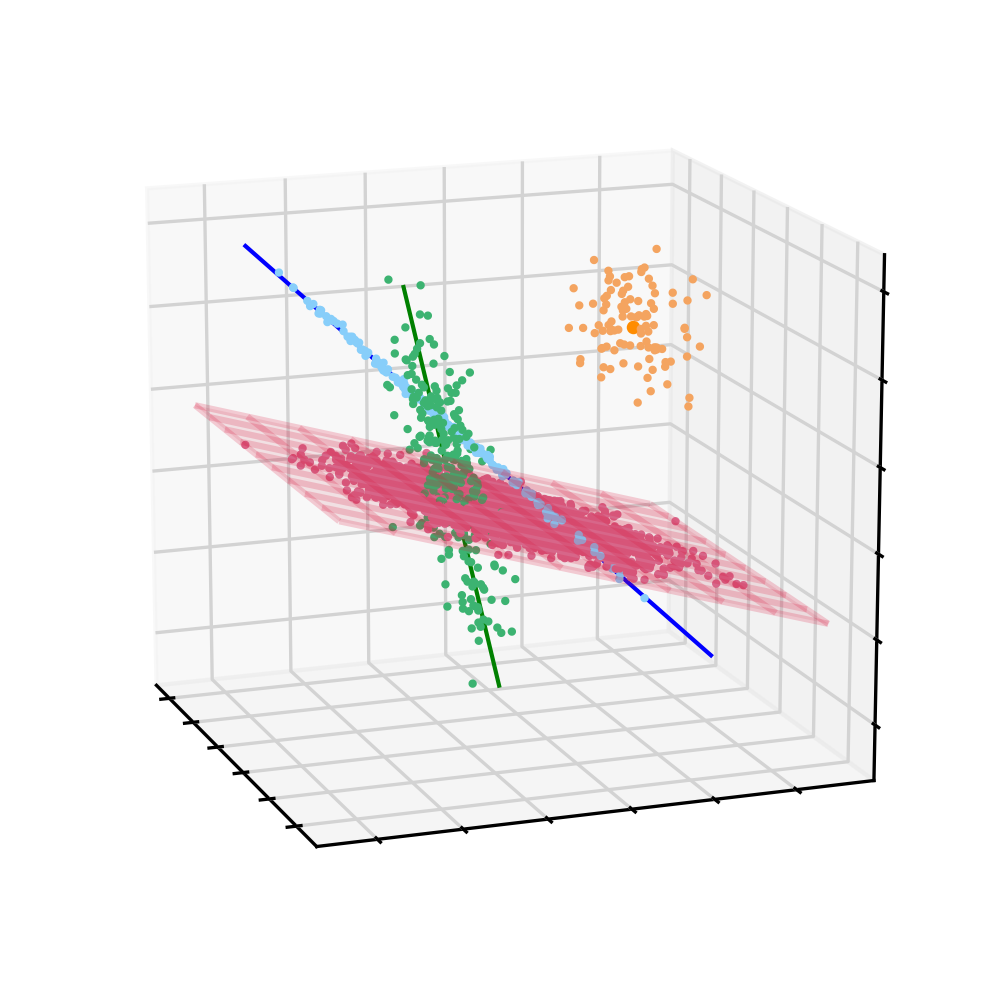

In [10]:
X = np.concatenate([X1,X2,X3,X4], axis = 0)
plot_3D(X, [s1,s2,s3,s4], color_probabilities = np.concatenate([c1,c2,c3,c4], axis = 0), el = 15, az = 160, f = '')

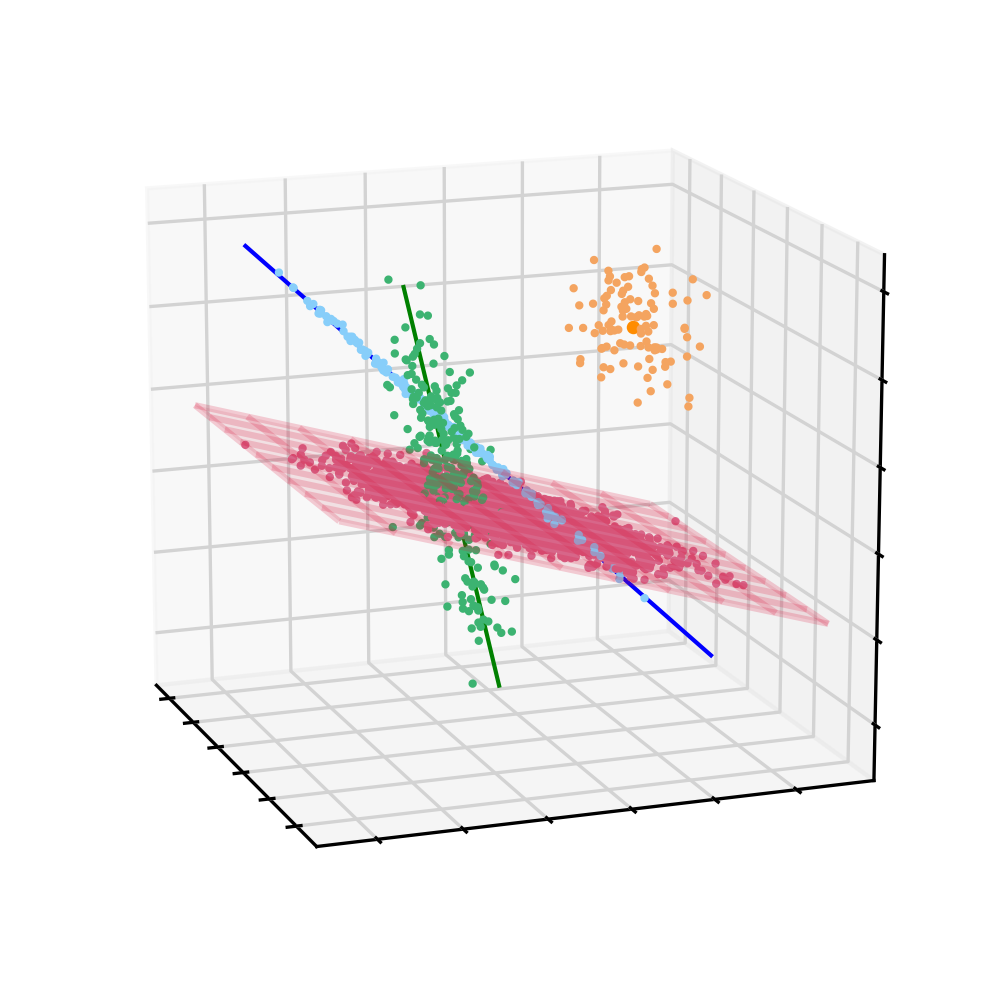

In [11]:
X = np.concatenate([X1,X2,X3,X4], axis = 0)
plot_3D(X, [s1,s2,s3,s4], color_probabilities = np.concatenate([c1,c2,c3,c4], axis = 0), el = 15, az = 160, f = 'figures/intro/ground.png')

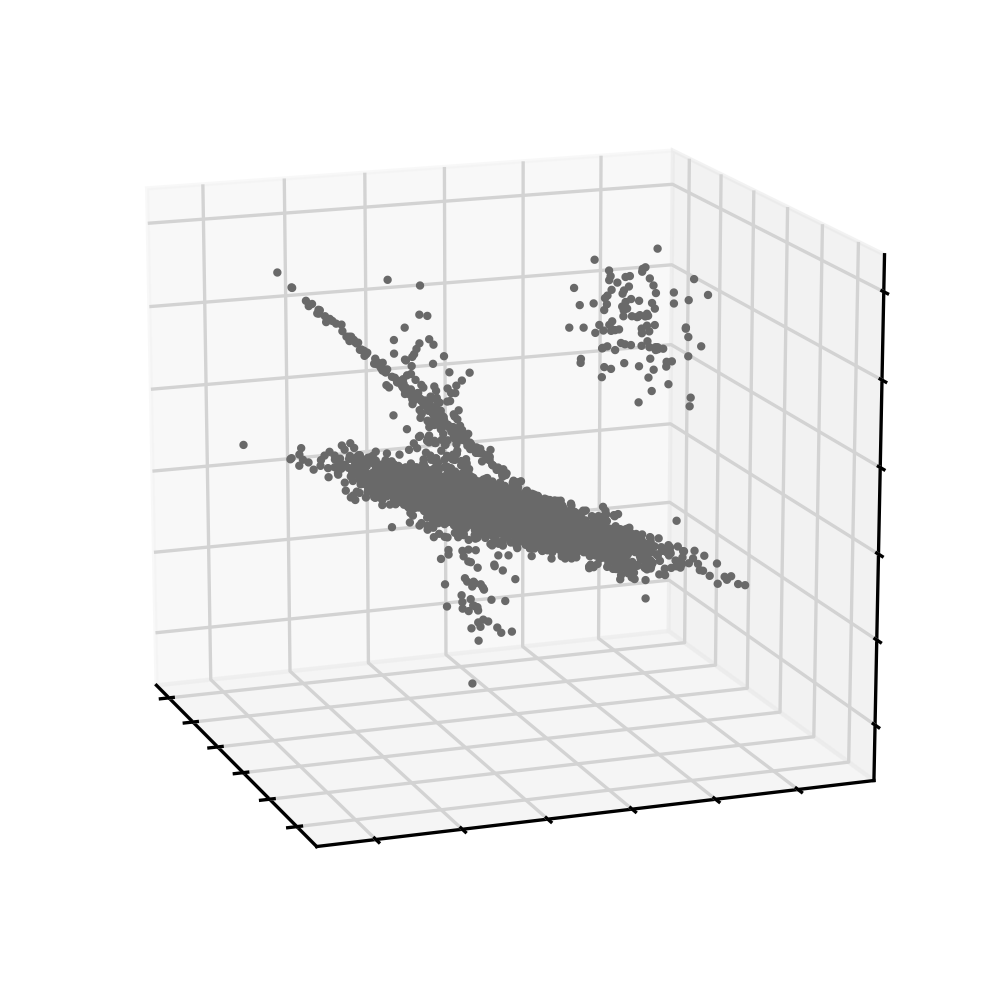

In [12]:
X = np.concatenate([X1,X2,X3,X4], axis = 0)
plot_3D(X, [], color_probabilities = [], el = 15, az = 160, f = 'figures/intro/gray.png')

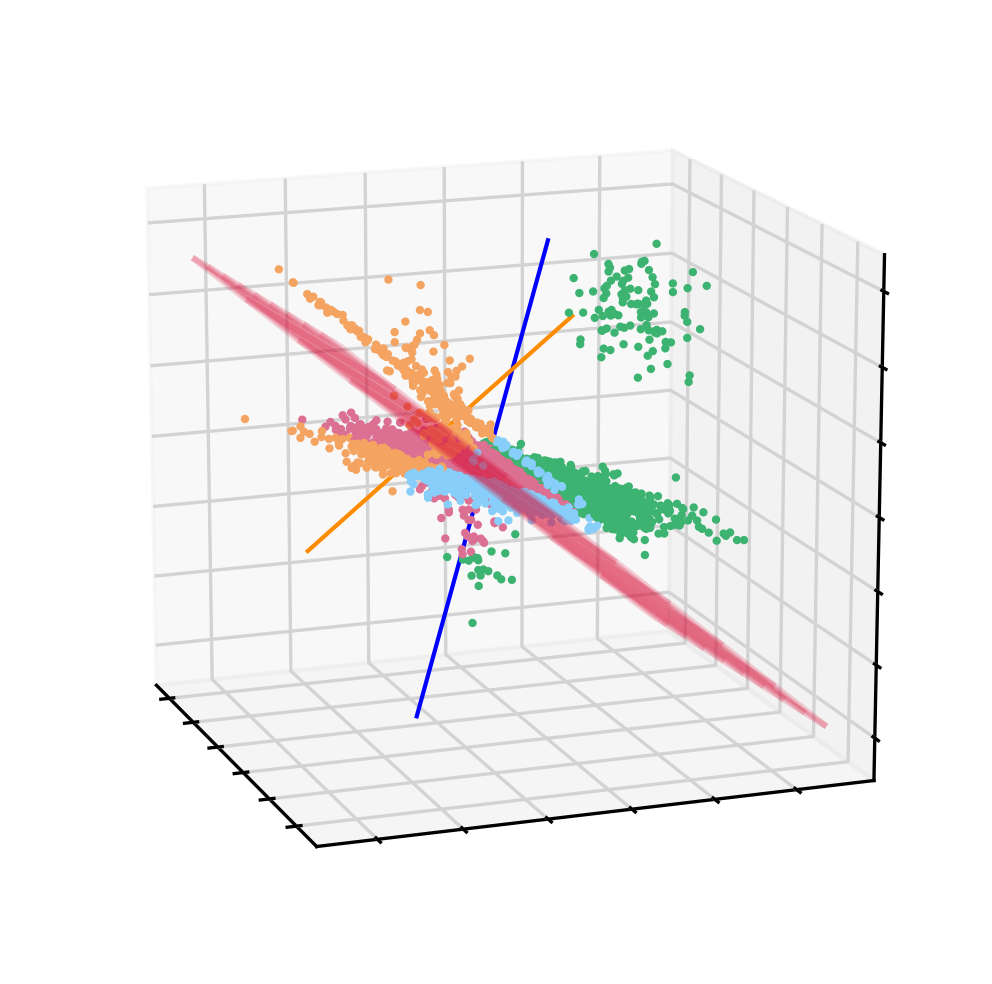

In [13]:
np.random.seed(2)
spaces = kspaces.EM.init(X, D = 3, kd = [2,1,1,0])
probabilities = kspaces.EM.E_step(X, spaces, assignment = 'soft')
plot_3D(X, spaces, color_probabilities = probabilities, el = 15, az = 160, f = 'figures/intro/init.png')

max iteration 1 completed
time per EM run: 0.021
time per E, M step : [0.0081 0.0094]


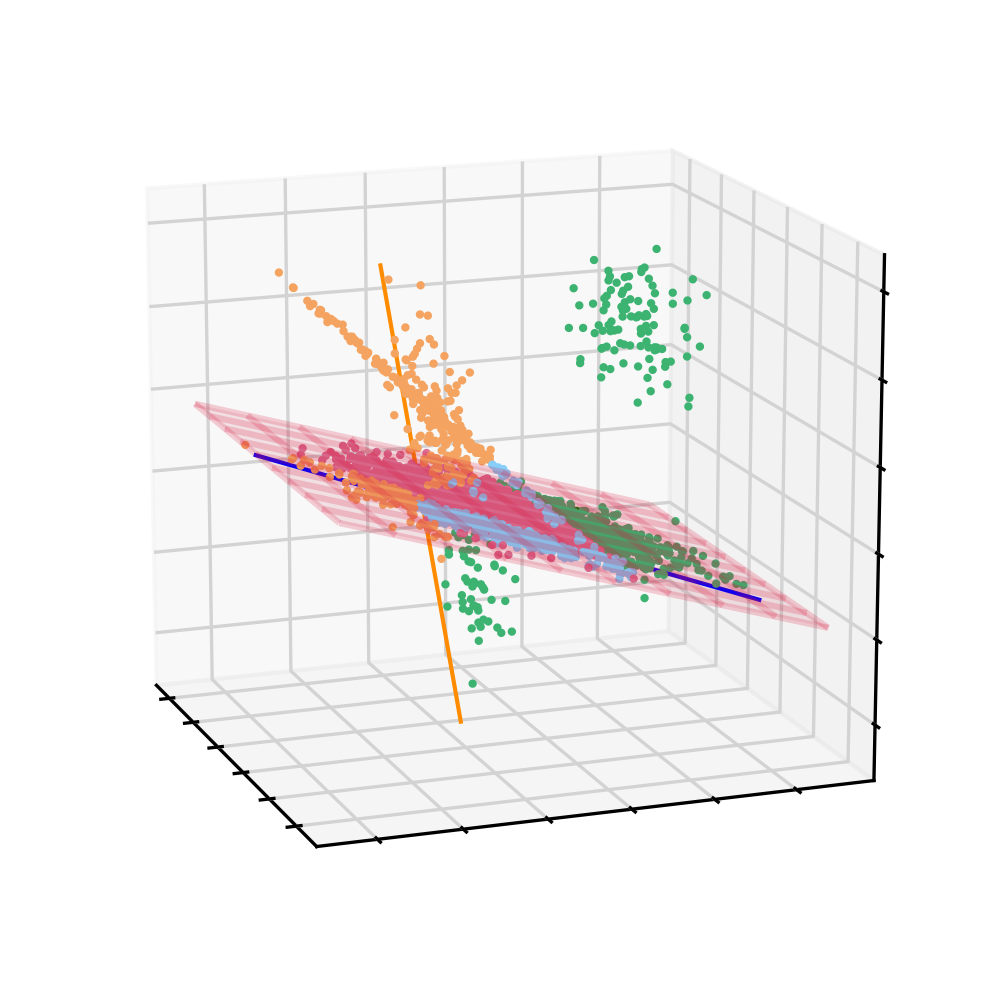

In [14]:
np.random.seed(2)
spaces, probabilities = kspaces.EM.run_EM(X, kd = [2,1,1,0], max_iter = 1, randomize_init = True)
plot_3D(X, spaces, color_probabilities = probabilities, el = 15, az = 160, f = 'figures/intro/iter1.png')

max iteration 4 completed
time per EM run: 0.02
time per E, M step : [0.0014 0.003 ]


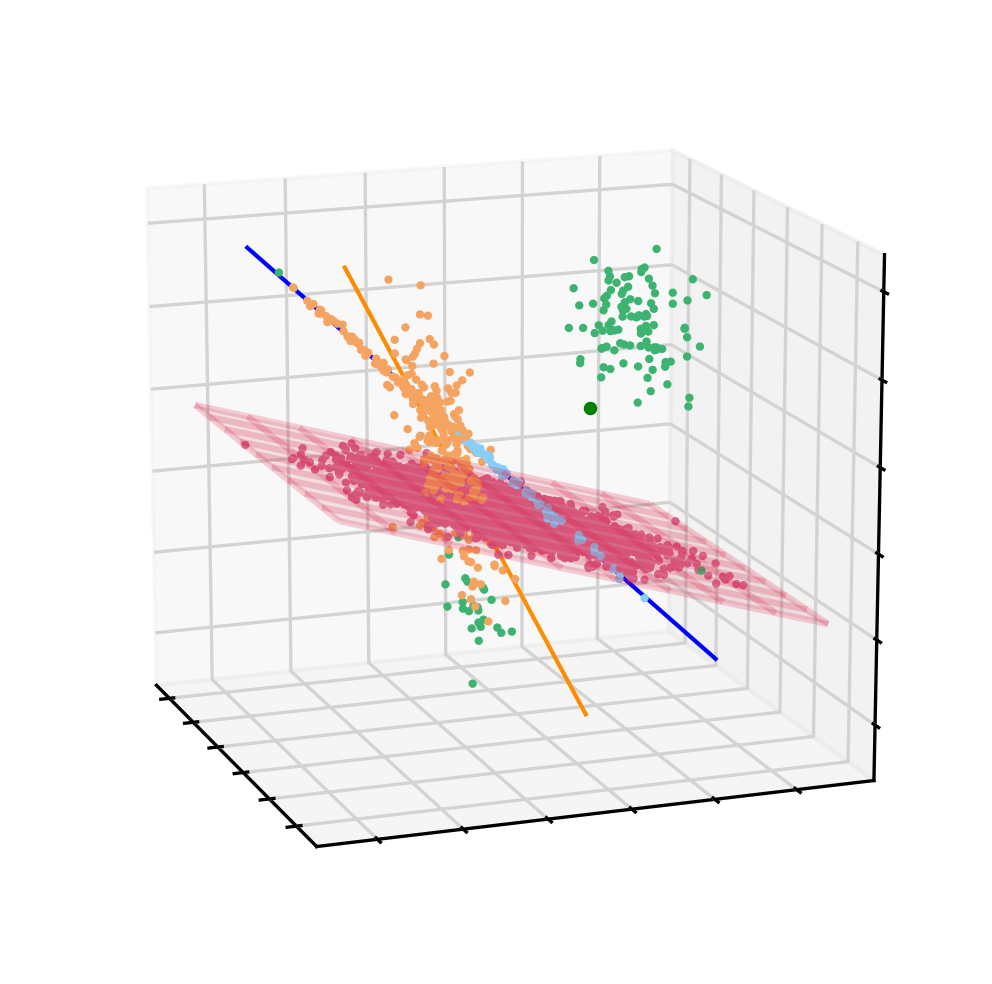

In [15]:
np.random.seed(2)
spaces, probabilities = kspaces.EM.run_EM(X, kd = [2,1,1,0], max_iter = 4, randomize_init = True)
plot_3D(X, spaces, color_probabilities = probabilities, el = 15, az = 160, f = 'figures/intro/iter4.png')

Converged on iteration 8
time per EM run: 0.035
time per E, M step : [0.0012 0.0029]


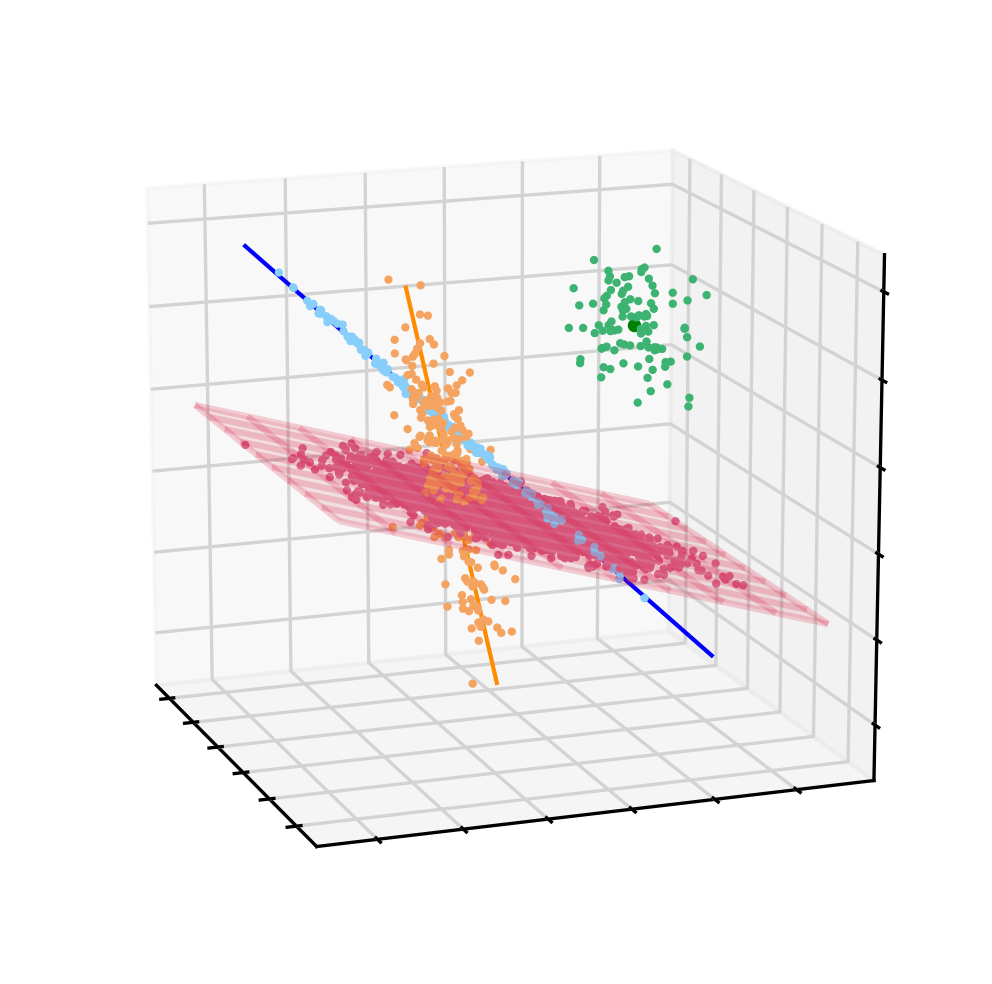

In [16]:
np.random.seed(2)
spaces_correct, probabilities = kspaces.EM.run_EM(X, kd = [2,1,1,0], max_iter = 50, initializations = 1, randomize_init = True)
plot_3D(X, spaces_correct, color_probabilities = probabilities, el = 15, az = 160, f = 'figures/intro/final_with_spaces.png')

Converged on iteration 29
time per EM run: 0.123
time per E, M step : [0.0012 0.0029]


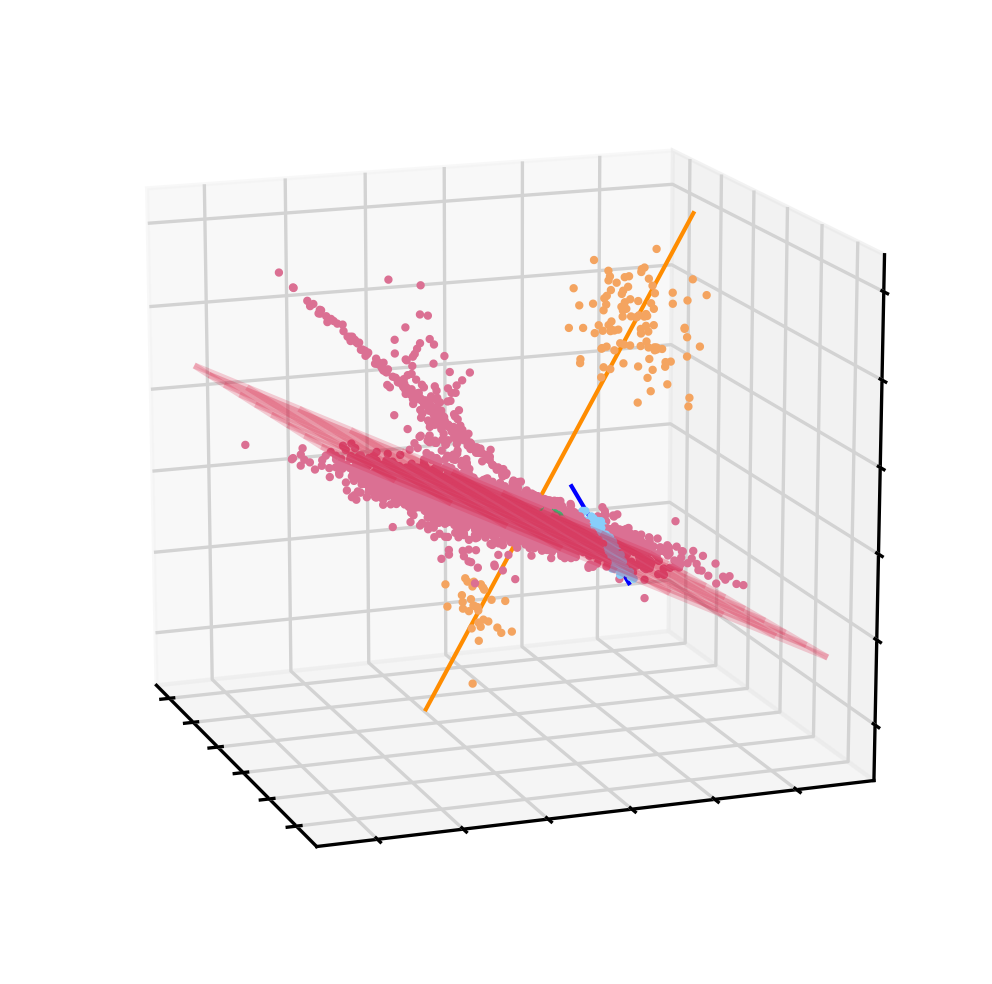

In [17]:
np.random.seed(0)
spaces, probabilities = kspaces.EM.run_EM(X, kd = [2,1,1,0], max_iter = 50, initializations = 1, randomize_init = True)
plot_3D(X, spaces, color_probabilities = probabilities, el = 15, az = 160, f = 'figures/intro/rand0.png')

Converged on iteration 12
time per EM run: 0.06
time per E, M step : [0.0014 0.0033]


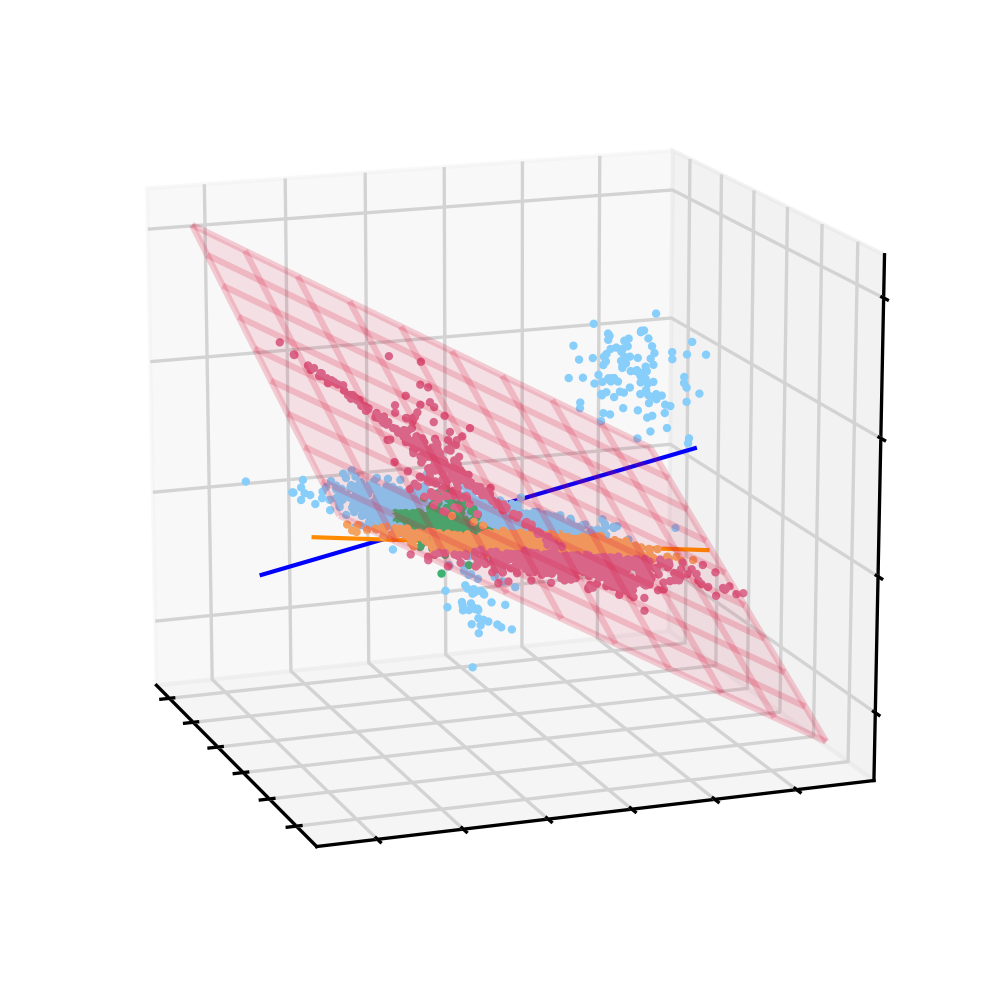

In [18]:
np.random.seed(1)
spaces, probabilities = kspaces.EM.run_EM(X, kd = [2,1,1,0], max_iter = 50, initializations = 1, randomize_init = True)
plot_3D(X, spaces, color_probabilities = probabilities, el = 15, az = 160, f = 'figures/intro/rand1.png')

Converged on iteration 10
time per EM run: 0.05
time per E, M step : [0.0015 0.0031]


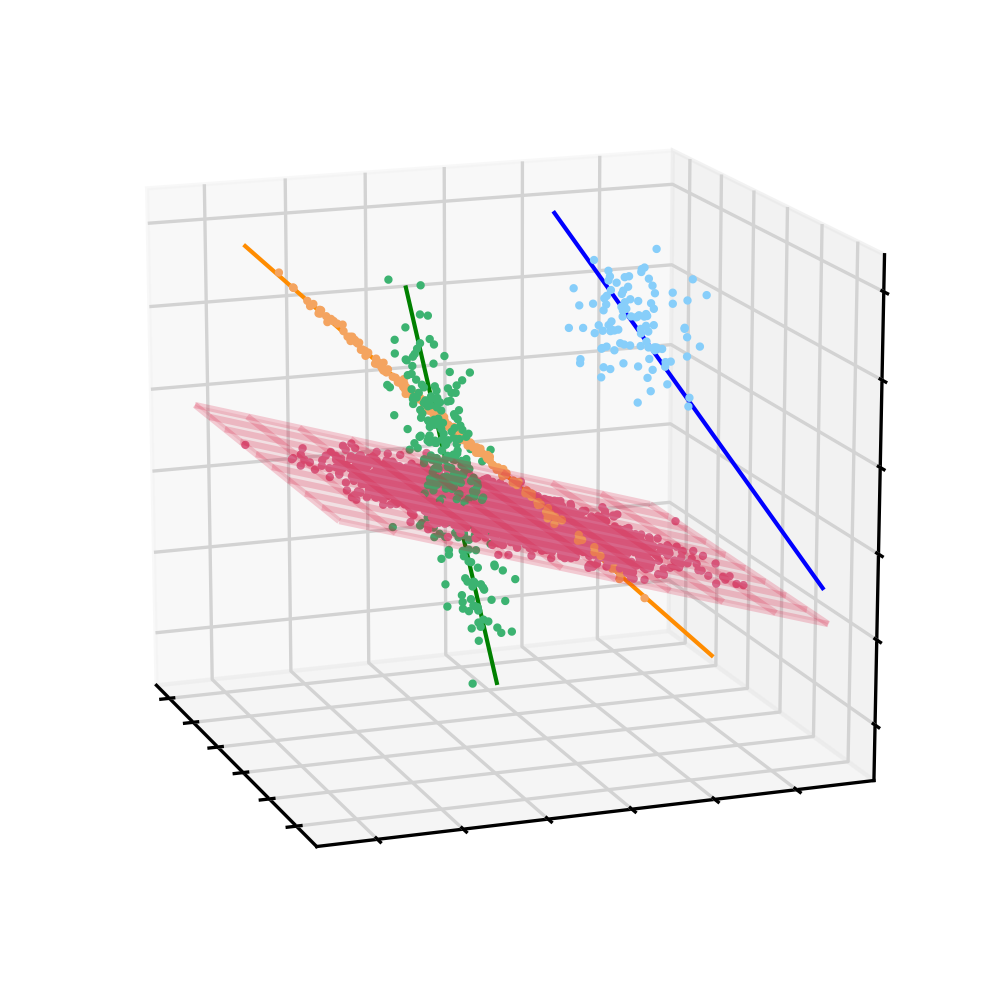

In [19]:
np.random.seed(1)
spaces_extra, probabilities = kspaces.EM.run_EM(X, kd = [2,1,1,1], max_iter = 50, initializations = 1, randomize_init = True)
plot_3D(X, spaces_extra, color_probabilities = probabilities, el = 15, az = 160, f = 'figures/intro/rand_extra.png')

Converged on iteration 31
time per EM run: 0.111
time per E, M step : [0.0011 0.0023]


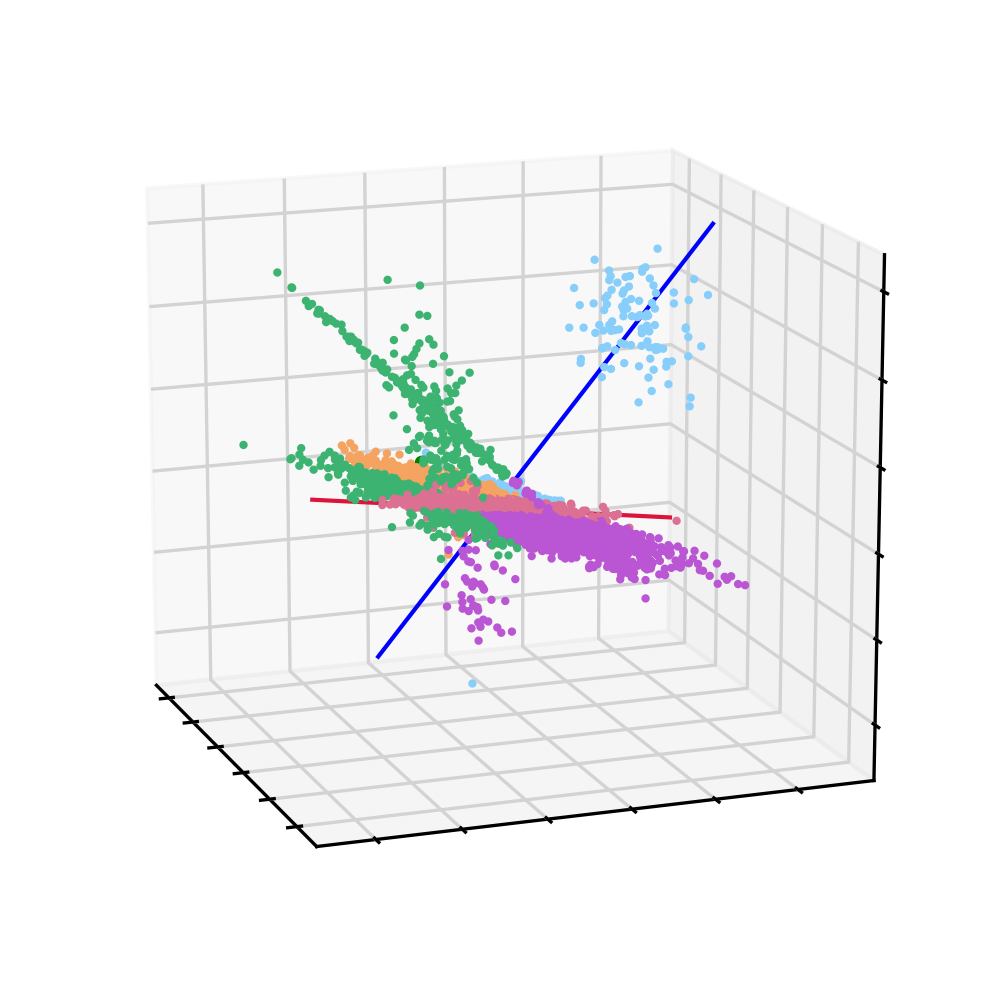

In [20]:
np.random.seed(1)
spaces_extra, probabilities = kspaces.EM.run_EM(X, kd = [1,1,0,0,0], max_iter = 50, initializations = 1, randomize_init = True)
plot_3D(X, spaces_extra, color_probabilities = probabilities, el = 15, az = 160, f = 'figures/intro/rand_underfit.png')

# K-means illustration

In [20]:
t1 = [2,2,0]
v1 = []
X1 = kspaces.generate.generate_points_subspace(t1, v1, 40, dist_std = 4, noise_std=1)
s1 = kspaces.affine_subspace_.affine_subspace(v1, t1, 0.1, [3,3], 0)
c1 =[[1,0,0,0]]*40

In [21]:
t2 = [0,6,6]
v2 = []
X2 = kspaces.generate.generate_points_subspace(t2, v2, 200, dist_std = 6, noise_std=0.5)
s2 = kspaces.affine_subspace_.affine_subspace(v2, t2, 0.1, [3], 0)
c2 = [[0,1,0,0]]*200

In [22]:
t3 = [7,-8,9]
v3 = []
X3 = kspaces.generate.generate_points_subspace(t3, v3, 100, dist_std = 3, noise_std=.3)
s3 = kspaces.affine_subspace_.affine_subspace(v3, t3, 0.5, [], 0)
c3 = [[0,0,1,0]]*100

In [31]:
t4 = [5,3,10]
v4 = []
X4 = kspaces.generate.generate_points_subspace(t4, v4, 300, dist_std = 5, noise_std=2)
s4 = kspaces.affine_subspace_.affine_subspace(v4, t4, 0.4, [5], 0)
c4 = [[0,0,0,1]]*300

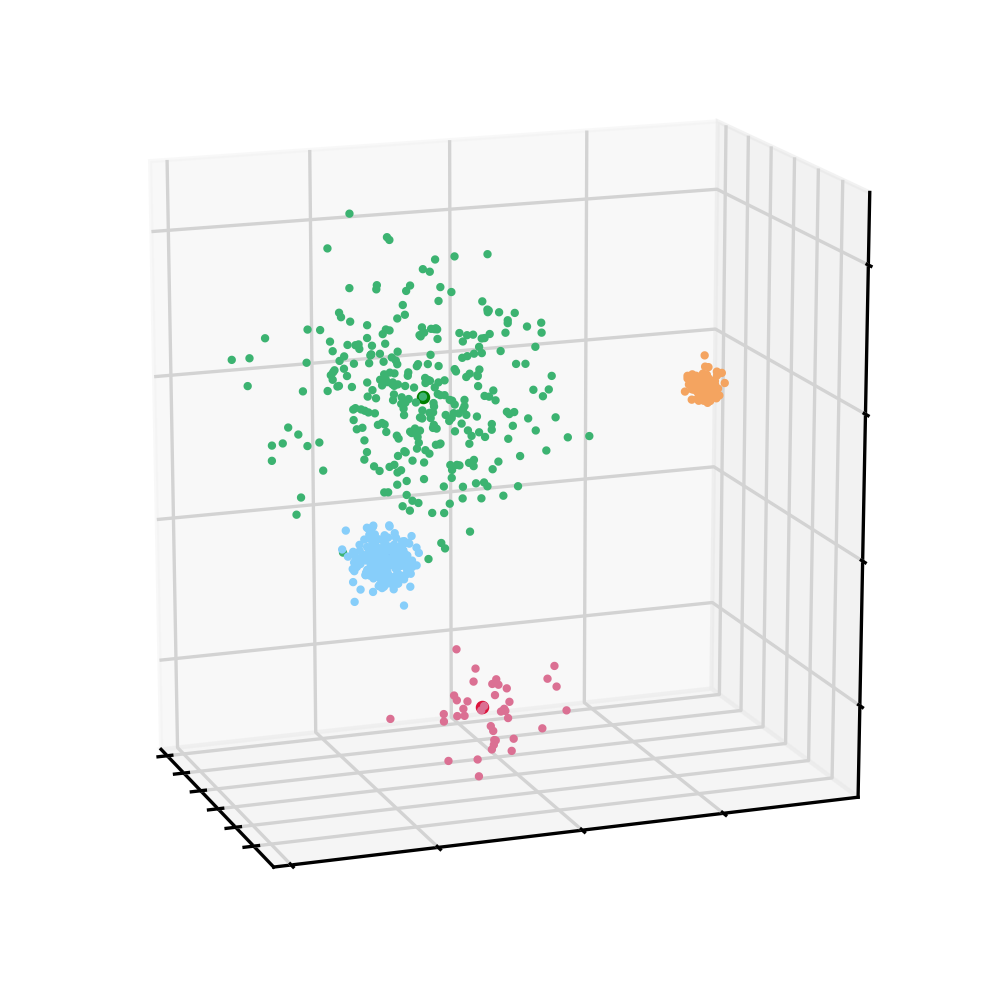

In [32]:
X = np.concatenate([X1,X2,X3,X4], axis = 0)
plot_3D(X, [s1,s2,s3,s4], color_probabilities = np.concatenate([c1,c2,c3,c4], axis = 0), el = 15, az = 160, f = '')

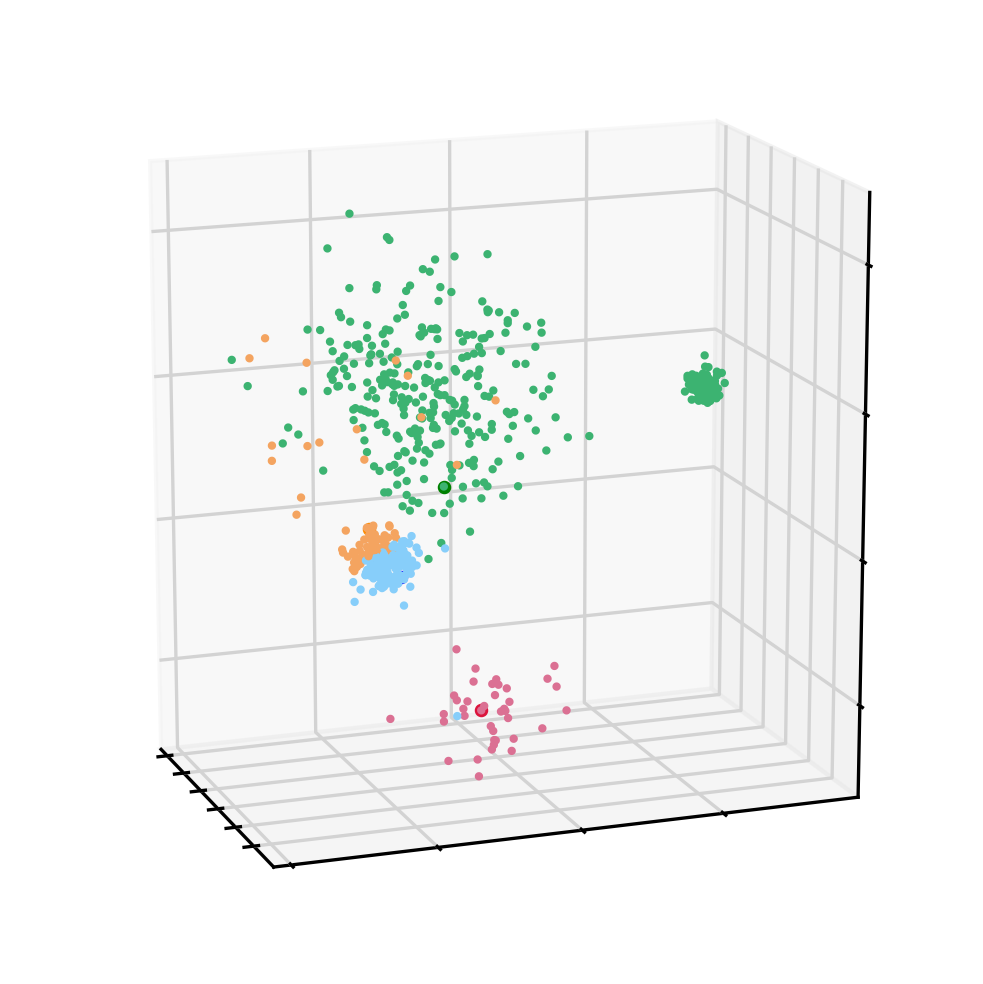

In [36]:
np.random.seed(1)
spaces = kspaces.EM.init(X, D = 3, kd = [0,0,0,0])
probabilities = kspaces.EM.E_step(X, spaces, assignment = 'closest')
plot_3D(X, spaces, color_probabilities = probabilities, el = 15, az = 160)

max iteration 2 completed
time per EM run: 0.012
time per E, M step : [0.0003 0.0043]


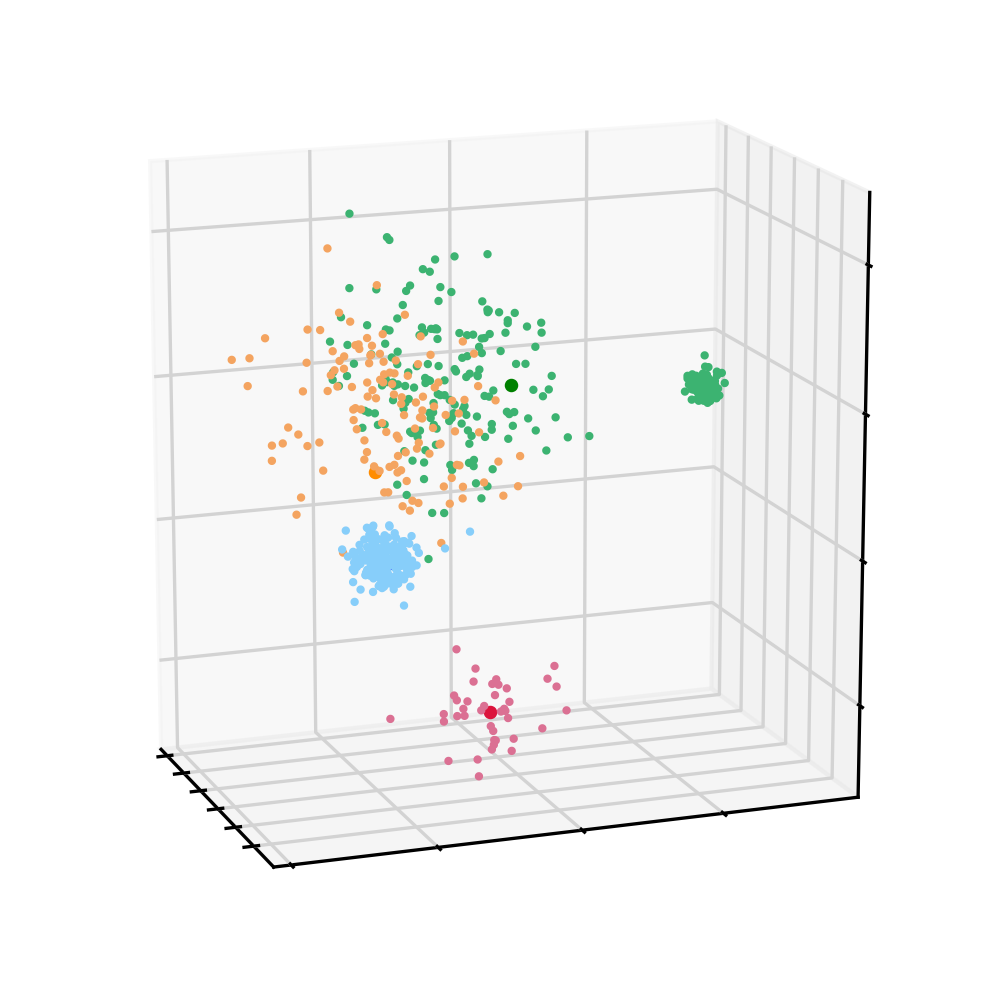

In [38]:
np.random.seed(1)
spaces_correct, probabilities = kspaces.EM.run_EM(X, kd = [0,0,0,0], assignment = 'closest', max_iter = 2, initializations = 1, randomize_init = True)
plot_3D(X, spaces_correct, color_probabilities = probabilities, el = 15, az = 160, f = '')

Converged on iteration 8
time per EM run: 0.02
time per E, M step : [0.0003 0.0021]


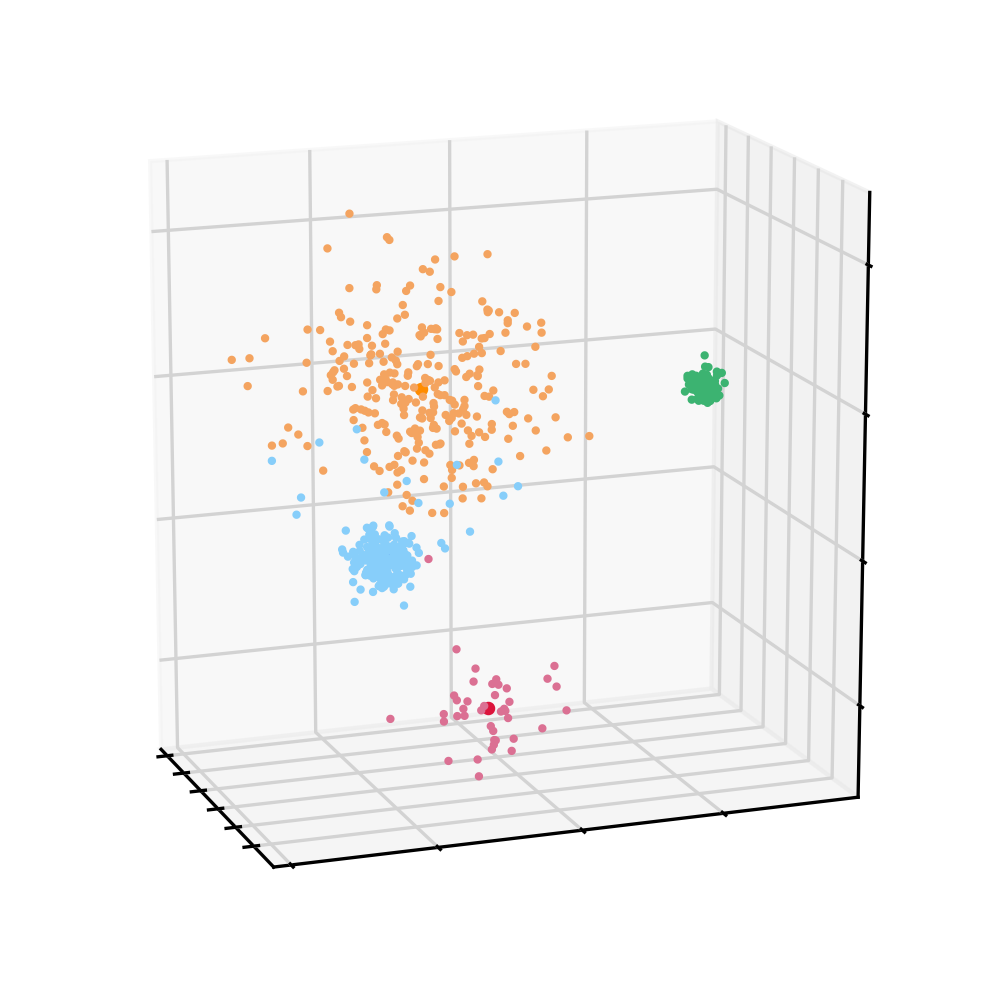

In [35]:
np.random.seed(1)
spaces_correct, probabilities = kspaces.EM.run_EM(X, kd = [0,0,0,0], assignment = 'closest', max_iter = 50, initializations = 1, randomize_init = True)
plot_3D(X, spaces_correct, color_probabilities = probabilities, el = 15, az = 160, f = '')